# Fordgobike trip data analysis and exploration 


## Preliminary Wrangling

This data set includes information about trips that people had

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [5]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
# structure of the dataset
print(df.shape)
df.info()

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

In [7]:
# drop nulls
trips = df.dropna()
trips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [8]:
# drop duplicates
trips.drop_duplicates(inplace=True)
sum(trips.duplicated())

<ipython-input-8-1cd34eb1569f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips.drop_duplicates(inplace=True)


0

In [9]:
# drop unnecessary data
trips.drop(columns = ['start_station_id','end_station_id','start_station_name','end_station_name','bike_id'])

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,37.789625,-122.400811,37.794231,-122.402923,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,37.769305,-122.426826,37.786375,-122.404904,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,37.774836,-122.446546,37.773311,-122.444293,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,37.804562,-122.271738,37.792714,-122.248780,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,37.770407,-122.391198,37.798014,-122.405950,Subscriber,1959.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,37.788059,-122.391865,37.788300,-122.408531,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,37.789625,-122.400811,37.778742,-122.392741,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,37.331932,-121.904888,37.333658,-121.908586,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,37.811351,-122.273422,37.817827,-122.275698,Subscriber,1988.0,Male,No


### What is the structure of your dataset?

This dataset has 174952 rows that represents trips and 11 column features
that gives us information about each trip

### What is/are the main feature(s) of interest in your dataset?
time they spent and the place they were there, gender of them and age

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

start_station_latitude, end_station_latitude, start_station_longitude, end_station_latitude , member_gender, member_birth_year


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [10]:
trips.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


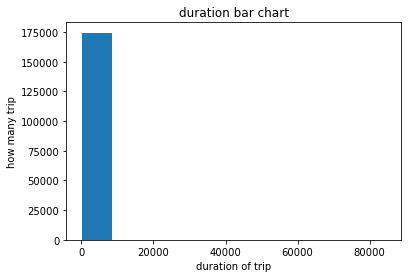

In [11]:
plt.hist(data = trips , x ='duration_sec')
plt.title('duration bar chart')
plt.ylabel('how many trip')
plt.xlabel('duration of trip');

# 1 - duration feature

In [12]:
np.log10(trips['duration_sec'].describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

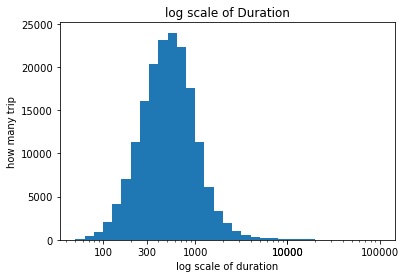

In [13]:
bins = 10 ** np.arange(1.7, 5+0.1, 0.1)
#print(bins)
ticks = [100, 300, 1000, 10000, 10000, 100000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data=trips, x='duration_sec', bins=bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.title('log scale of Duration');
plt.ylabel('how many trip')
plt.xlabel('log scale of duration');

aobut 45k of over all trips has a log scale of duration between 500 and 800

 # 2 - Time of the year (Month and Day )people prefer to make trips

In [14]:
import re
from datetime import datetime

In [15]:
trips['start_time'] = pd.to_datetime(df['start_time'], format='%Y%m%d %H:%M:%S')
trips['month'] = trips['start_time'].map(lambda x : x.month)
trips['day'] = trips['start_time'].map(lambda x : x.day)
trips['dayofweek'] = trips['start_time'].map(lambda x : x.dayofweek)
trips.head()

<ipython-input-15-5e006fac2eeb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips['start_time'] = pd.to_datetime(df['start_time'], format='%Y%m%d %H:%M:%S')
<ipython-input-15-5e006fac2eeb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips['month'] = trips['start_time'].map(lambda x : x.month)
<ipython-input-15-5e006fac2eeb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,day,dayofweek
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2,28,3
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2,28,3
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2,28,3
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2,28,3
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,2,28,3


Text(0.5, 1.0, 'month bar chart')

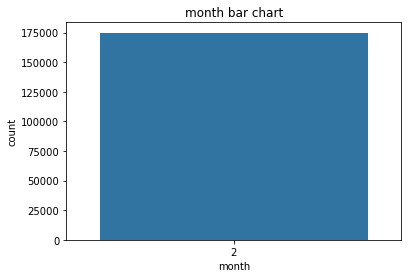

In [16]:
sb.countplot(data = trips , x = 'month' , color = sb.color_palette()[0])
plt.xlabel('month')
plt.title('month bar chart')

it seems that most people tend to make trips on february

Text(0, 0.5, 'how many trip')

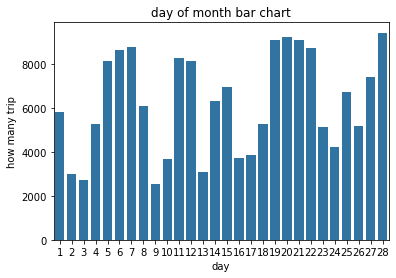

In [17]:
sb.countplot(data = trips , x = 'day' , color = sb.color_palette()[0])
plt.xlabel('day')
plt.title('day of month bar chart')
plt.ylabel('how many trip')


it seems that most people tend to make trips most in day of on 28 of the month

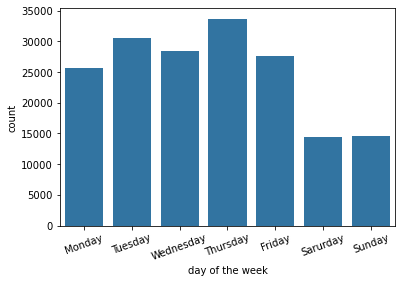

In [18]:
sb.countplot(data = trips , x = 'dayofweek' , color = sb.color_palette()[0])
plt.xlabel('day of the week')
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Sarurday','Sunday']
plt.xticks([0,1,2,3,4,5,6],days,rotation=20);

it seems that most people tend to make trips most in Thursday

# 3 - the gender of the people 

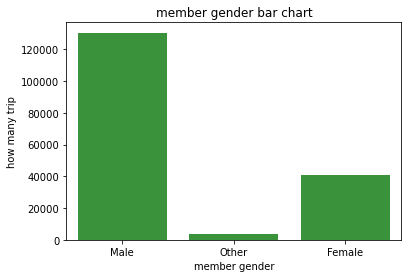

In [19]:
sb.countplot(data = trips , x = 'member_gender' , color = sb.color_palette()[2])
plt.title('member gender bar chart')
plt.ylabel('how many trip')
plt.xlabel('member gender');

In [20]:
# Returns the sum of all not-null values in `type` column
n_trips = trips['member_gender'].value_counts().sum()
# print(n_trips)
# Return the highest frequency in the `type` column
type_counts = trips.member_gender.value_counts()
max_type_count = type_counts[0]

# Return the maximum proportion, or in other words, 
# compute the length of the longest bar in terms of the proportion
max_prop = max_type_count / n_trips
print(max_prop)

0.7459188806072523


In [21]:
tick_props = np.arange(0, max_prop, 0.1)
tick_props

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])

In [22]:
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

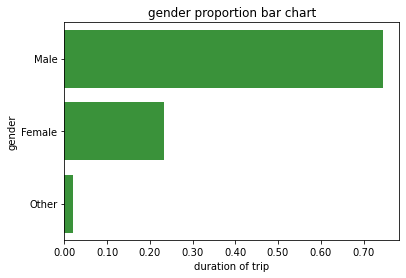

In [23]:
base_color = sb.color_palette()[2]
sb.countplot(data=trips, y='member_gender', color=base_color, order=type_counts.index);
# Change the tick locations and labels
plt.xticks(tick_props * n_trips, tick_names)
plt.title('gender proportion bar chart')
plt.ylabel('gender')
plt.xlabel('duration of trip');

It's clear that about 70% of the people who makes trips are men and about 27% are women

 # 4 - How much distance prople usually pass in their trips

In [24]:
trips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,day,dayofweek
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2,28,3
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2,28,3
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2,28,3
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2,28,3
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,2,28,3


In [25]:
trips['covered_distance'] = np.sqrt(((trips.end_station_latitude - trips.start_station_latitude) ** 2) + ((trips.end_station_longitude - trips.start_station_longitude) ** 2))

<ipython-input-25-2aac0de34ed6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips['covered_distance'] = np.sqrt(((trips.end_station_latitude - trips.start_station_latitude) ** 2) + ((trips.end_station_longitude - trips.start_station_longitude) ** 2))


In [26]:
trips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,day,dayofweek,covered_distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2,28,3,0.005067
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2,28,3,0.027784
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2,28,3,0.002721
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2,28,3,0.025835
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,2,28,3,0.031301


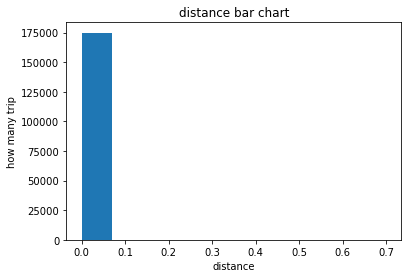

In [27]:
plt.hist(data = trips , x = 'covered_distance' , color = sb.color_palette()[0]);
plt.title('distance bar chart')
plt.ylabel('how many trip')
plt.xlabel('distance');

Most trips didn't require moving It seems to be in the same place

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

#  How old are people who makes trips?

In [28]:
trips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,day,dayofweek,covered_distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2,28,3,0.005067
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2,28,3,0.027784
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2,28,3,0.002721
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2,28,3,0.025835
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,2,28,3,0.031301


In [29]:
from datetime import date 

In [30]:
trips['age'] = date.today().year - trips['member_birth_year']
trips.head()

<ipython-input-30-9e9197ba4d8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips['age'] = date.today().year - trips['member_birth_year']


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,day,dayofweek,covered_distance,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,2,28,3,0.005067,37.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,2,28,3,0.027784,49.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,2,28,3,0.002721,32.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,2,28,3,0.025835,47.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,No,2,28,3,0.031301,62.0


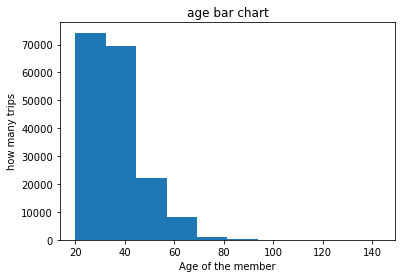

In [31]:
plt.hist(data = trips , x = 'age' , color = sb.color_palette()[0]);
plt.title('age bar chart')
plt.ylabel('how many trips')
plt.xlabel('Age of the member');

It's clear that most people who make trips are between 20 and 30 years old
and then people who are between 30 and 40 years old
then people between 40 and 55
and few people more than 55 years old

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


There weren't much unusual points and I needed to transform start date from string to datetime object and I needed also to compute distance column from data

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I applied on the covoered distance feature to convert it to log scale

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [32]:
trips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,day,dayofweek,covered_distance,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,2,28,3,0.005067,37.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,2,28,3,0.027784,49.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,2,28,3,0.002721,32.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,2,28,3,0.025835,47.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,No,2,28,3,0.031301,62.0


# 1 -  Duration & Member gender

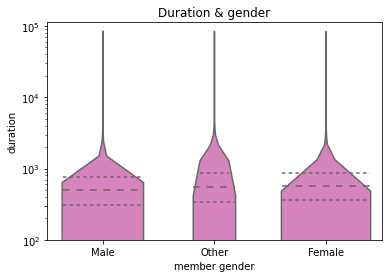

In [33]:
sb.violinplot(data=trips,x='member_gender',y='duration_sec',inner='quartile',color=sb.color_palette()[6]);
plt.yscale('log')
plt.yticks([ 100,300,1000,10000,100000])
plt.title('Duration & gender');
plt.ylabel('duration')
plt.xlabel('member gender');

males and females have nearly the same median
others tends to spend more duration

#  2 - Usertype & Age

In [34]:
trips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,day,dayofweek,covered_distance,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,2,28,3,0.005067,37.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,2,28,3,0.027784,49.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,2,28,3,0.002721,32.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,2,28,3,0.025835,47.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,No,2,28,3,0.031301,62.0


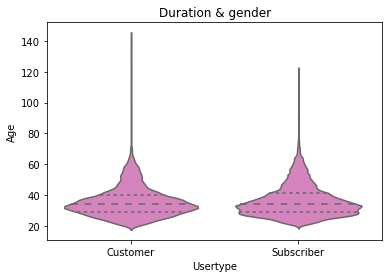

In [35]:
sb.violinplot(data=trips,x='user_type',y='age',inner='quartile',color=sb.color_palette()[6]);
plt.title('Duration & gender');
plt.ylabel('Age')
plt.xlabel('Usertype');

Customers and Subscribers seems to have nearly the same median below 40 years old

# 3 - Age & duration

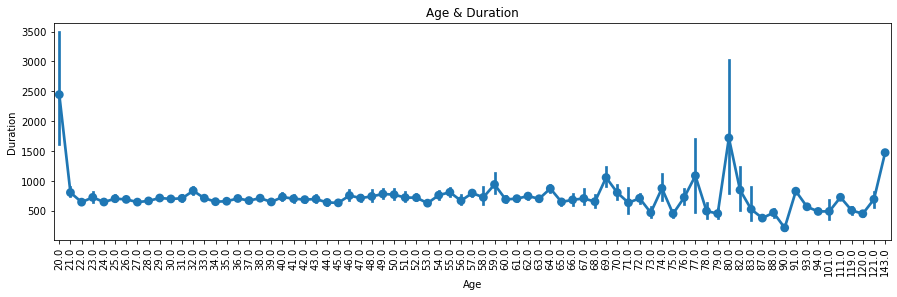

In [36]:
plt.figure(figsize = [15,4]);
sb.pointplot(data=trips,x='age',y='duration_sec');
plt.xticks(rotation=90);
plt.title('Age & Duration')
plt.ylabel('Duration')
plt.xlabel('Age');

people above 70 tends to spend less time in their trips
and people below 50 tends to spend more time in their trips

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

males and females spend approximately the same duraiton in their trips
Customers and Subscribers seems to have nearly the same median below 40 years old
and people below 50 tends to spend more time in their trips
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
there is a relationship between memberbitrh data and duration 
as young people spend more time in thier trips


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [37]:
trips.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,month,day,dayofweek,covered_distance,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,2,28,3,0.005067,37.0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,2,28,3,0.027784,49.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,2,28,3,0.002721,32.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,2,28,3,0.025835,47.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,No,2,28,3,0.031301,62.0


# 1 - duration & gender & day od week

Text(0.5, 0, 'Day of the week')

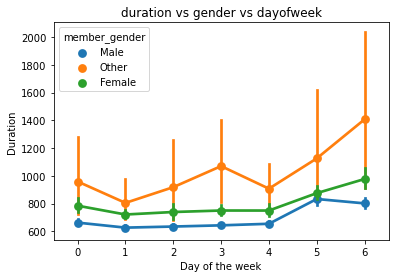

In [38]:
sb.pointplot(data=trips,x='dayofweek',y='duration_sec',hue='member_gender');
plt.title('duration vs gender vs dayofweek');
plt.ylabel('Duration')
plt.xlabel('Day of the week')

# 2 - duratoion & day of week & usertype

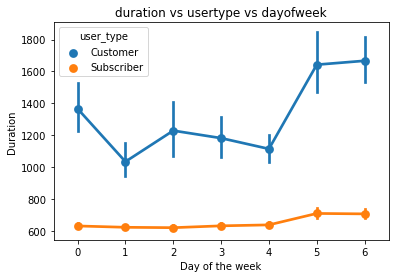

In [39]:
sb.pointplot(data=trips,x='dayofweek',y='duration_sec',hue='user_type');
plt.title('duration vs usertype vs dayofweek')
plt.ylabel('Duration')
plt.xlabel('Day of the week');

# 3 - gender & usertype & duration

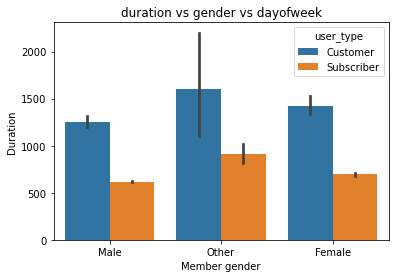

In [40]:
sb.barplot(data=trips,x='member_gender',y='duration_sec',hue='user_type');
plt.title('duration vs gender vs dayofweek');
plt.ylabel('Duration')
plt.xlabel('Member gender');

# 4 - dayofweek & member_gender & duration_sec  

C:\Users\Ahmed Magdi\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


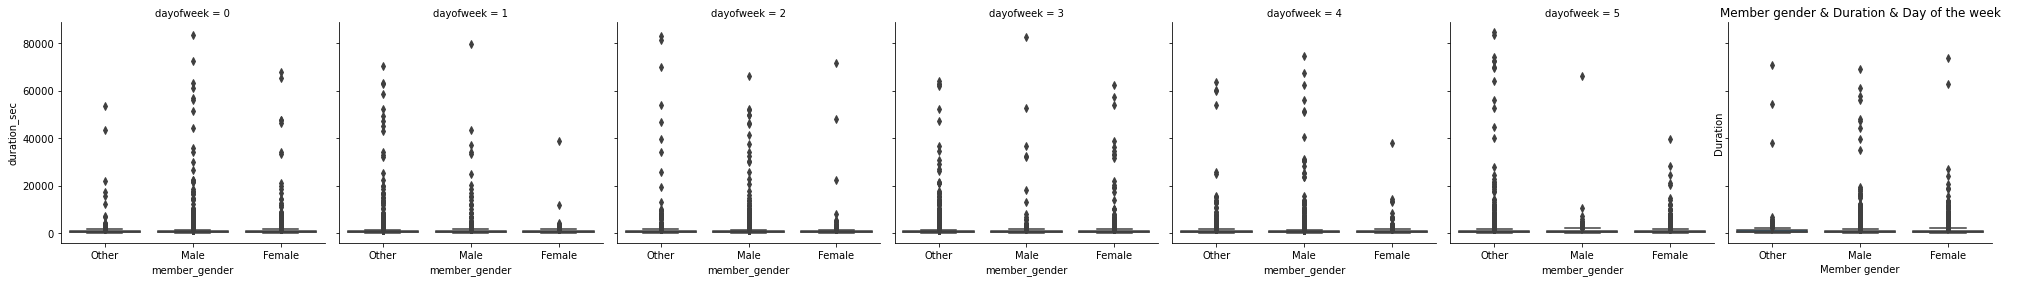

In [41]:
g = sb.FacetGrid(data = trips, col = 'dayofweek', height = 4)
g.map(sb.boxplot, 'member_gender', 'duration_sec')
g.add_legend()
plt.title('Member gender & Duration & Day of the week')
plt.ylabel('Duration')
plt.xlabel('Member gender');

men tends to spend more duration on monday,wednesday,friday and sunday
while women on thursday and other genders at tuesday

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

1 - men tends to spend more duration on monday,wednesday,friday and sunday
while women on thursday and other genders at tuesday
2 - other gender spend more duration than females than males
3 - customers spend more duration than subscriber according to days of the week and the gender
### Were there any interesting or surprising interactions between features?
customers spend more duration than subscriber according to days of the week and the gender

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!